### Projektarbeit - "Electricity Mix" by Mert Basaran

##### Im Rahmen der Projektarbeit des Data Analytics Kurses wird ein Datensatz aus Our World in Data zur Hilfe genommen, um anhand der vorhandenen Daten zu analysieren woher der Strom im jeweiligen Land kommt und wie das sich im Laufe der Zeit ändert.

##### Der Datensatz wurde aus folgendem Artikel entnommen: https://ourworldindata.org/electricity-mix

##### Für die Projektarbeit sollen in der Gruppe Korrelationen unterschiedlicher Datensätze analysiert werden, um herauszufinden, ob es aussagekräftige Beziehungen zwischen einzelner Datensätze gibt.
##### Zu Beginn wird jeder Datensatz individuell von jedem Gruppenmitglied nach folgenden Schritten bearbeitet:
* Datensatz suchen und auswählen
* Aufteilung der Datensätze in der Gruppe
* Datenbereinigung und Datenaufbereitung (falls notwendig)
* Feature Engineering (falls notwendig)
* Deskriptive Datenanalyse
* Explorative Datenanalyse
* Zusammenführung der Datensätze um Korrelationen zu analysieren

## Allgemeine Infos und mögliche Fragestellungen

#### Bevor mit der eigentlichen Projektarbeit begonnen wird, ist es von großer Bedeutung, sich mit dem Datensatz und der Thematik vertraut zu machen. Wie heißt es so schön? - "Kenne deine Daten!" 
#### Im Allgemeinen befasst sich der Artikel mit der weltweiten Stromproduktion und wie sich dessen Quellen, etwa **fossile Brennstoffe** (wie Kohle, Gas und Öl), **erneuerbare Energien** (Wind, Solar und Wasserkraft) oder **Kernkraft**, zusammensetzen. 

#### Folgende Fragen kommen hierbei auf:
* Woher beziehen wir unseren Strom?
    * Welche Quellen machen unseren Strommix weltweit aus?
    * Wie viel stammt aus Kohle, Öl und Gas, und wie viel aus Kernkraft, Wasserkraft, Solar- oder Windenergie für einzelne Länder ? 
    * Wie verändern sich weltweit die Quellen im Laufe der Jahre?
    * Wie viel Strom kommt prozentual aus kohlenstoffarmen Quellen?
        * Wie viel wird hierbei anteilig aus Wind, Solar oder Wasserkraft gewonnen?
        * Welche Länder beziehen den Strom aus kohlenstoffenarmen Quellen und gelten als Vorbild für die Umwelt? 
        * Wie viel CO2 wird pro kWh in den jeweiligen Ländern ausgestoßen?
    * Wie ist die Auflistung der Stromerzeung fossiler Brennstoffe?
        * Wie viel wird hierbei anteilig aus Kohle, Gas, oder Öl gewonnen?
    * Wie ist die Gegenüberstellung von fossilen Brennstoffen, erneuerbaren Energien und Kernkraft?
    
* Welche Länder haben die saubersten Stromnetze?


## Datenbereinigung

#### Nachdem wir uns jetzt mit der Thematik vertraut gemacht haben, kann mit der Datenbereinigung gestartet werden.

#### Im Artikel wird beschrieben, dass die Daten aus folgenden Quellen stammen und von Our World in Data aufbereitet wurden: 
* Ember - Yearly Electricity Data
    * Daten erhalten am: 2024-05-08
    * Daten erhalten von: https://ember-climate.org/data-catalogue/yearly-electricity-data/
    * Ember gilt als Hauptquelle für Stromdaten. Ember stellt Daten ab 1990 bereit und wenn Daten für ein bestimmtes Land und Jahr nicht verfügbar sind, wurden diese durch Daten vom Energy Institute ergänzt. 
* Energy Institute - Statistical Review of World Energy
    * Daten erhalten am: 2024-06-20
    * Daten erhalten von: https://www.energyinst.org/statistical-review/
    * Energy Institute liefert Daten bis zurück ins Jahr 1965, allerdings werden nicht alle Länder und alle Stromquellen abgedeckt.

In [7]:
# Importieren der benötigten Bibliotheken

import numpy as np
import pandas as pd

print('NumPy Version:', np.__version__)
print('Pandas Version:', pd.__version__)

NumPy Version: 1.24.4
Pandas Version: 2.1.1


In [8]:
# Datensatz über pandas einlesen und als Variable festlegen

df = pd.read_csv("electricity-prod-source-stacked.csv")

# Info über den Aufbau des Datensatzes

print("Datensatz Shape:", df.shape) 
print("Zeilen:", df.shape[0]) # Genaue Zeilenanzahl über Index abfragen
print("Spalten:", df.shape[1]) # Genaue Spaltenanzahl über Index abfragen


Datensatz Shape: (6468, 12)
Zeilen: 6468
Spalten: 12


In [9]:
# Ersten Einblick in den Datensatz 
df.head(5)

,Entity,Code,Year,Other renewables excluding bioenergy - TWh (adapted for visualization of chart electricity-prod-source-stacked),Electricity from bioenergy - TWh (adapted for visualization of chart electricity-prod-source-stacked),Electricity from solar - TWh (adapted for visualization of chart electricity-prod-source-stacked),Electricity from wind - TWh (adapted for visualization of chart electricity-prod-source-stacked),Electricity from hydro - TWh (adapted for visualization of chart electricity-prod-source-stacked),Electricity from nuclear - TWh (adapted for visualization of chart electricity-prod-source-stacked),Electricity from oil - TWh (adapted for visualization of chart electricity-prod-source-stacked),Electricity from gas - TWh (adapted for visualization of chart electricity-prod-source-stacked),Electricity from coal - TWh (adapted for visualization of chart electricity-prod-source-stacked)
0,ASEAN (Ember),NaN,2000,16.93,5.87,0.0,0.0,50.45,0.0,65.07,164.26,76.03
1,ASEAN (Ember),NaN,2001,16.40,6.46,0.0,0.0,54.33,0.0,50.99,190.41,86.26
2,ASEAN (Ember),NaN,2002,16.61,6.62,0.0,0.0,53.29,0.0,54.32,208.92,93.43
3,ASEAN (Ember),NaN,2003,15.74,7.45,0.0,0.0,53.21,0.0,53.32,226.51,102.01
4,ASEAN (Ember),NaN,2004,16.57,8.40,0.0,0.0,52.99,0.0,59.43,244.16,115.01


##### Die Funktion df.head() gibt uns einen ersten Einblick in den Datensatz. 
##### Hier wird deutlich, dass aufgrund der langen Spaltennamen, sich die Tabelle weiter in die Breite erstreckt. 
##### Aus diesem Grund werden alle Spaltennamen so gekürzt, sodass nur noch die Quelle für die Stromerzeugung in TWh beschrieben wird.

In [11]:
# Spaltennamen umbenennen und kürzen
df_new = df.rename(columns={"Other renewables excluding bioenergy - TWh (adapted for visualization of chart electricity-prod-source-stacked)": "Renewables excl. bioenergy (TWh)",
                "Electricity from bioenergy - TWh (adapted for visualization of chart electricity-prod-source-stacked)": "Bioenergy (TWh)",
                "Electricity from solar - TWh (adapted for visualization of chart electricity-prod-source-stacked)": "Solar (TWh)",
                "Electricity from wind - TWh (adapted for visualization of chart electricity-prod-source-stacked)": "Wind (TWh)",
                "Electricity from hydro - TWh (adapted for visualization of chart electricity-prod-source-stacked)": "Hydro (TWh)",
                "Electricity from nuclear - TWh (adapted for visualization of chart electricity-prod-source-stacked)": "Nuclear (TWh)",
                "Electricity from oil - TWh (adapted for visualization of chart electricity-prod-source-stacked)": "Oil (TWh)",
                "Electricity from gas - TWh (adapted for visualization of chart electricity-prod-source-stacked)": "Gas (TWh)",
                "Electricity from coal - TWh (adapted for visualization of chart electricity-prod-source-stacked)": "Coal (TWh)"}
    )
# Ansicht über Datensatz mit neuen Spaltennamen
df_new.head(5)

,Entity,Code,Year,Renewables excl. bioenergy (TWh),Bioenergy (TWh),Solar (TWh),Wind (TWh),Hydro (TWh),Nuclear (TWh),Oil (TWh),Gas (TWh),Coal (TWh)
0,ASEAN (Ember),NaN,2000,16.93,5.87,0.0,0.0,50.45,0.0,65.07,164.26,76.03
1,ASEAN (Ember),NaN,2001,16.40,6.46,0.0,0.0,54.33,0.0,50.99,190.41,86.26
2,ASEAN (Ember),NaN,2002,16.61,6.62,0.0,0.0,53.29,0.0,54.32,208.92,93.43
3,ASEAN (Ember),NaN,2003,15.74,7.45,0.0,0.0,53.21,0.0,53.32,226.51,102.01
4,ASEAN (Ember),NaN,2004,16.57,8.40,0.0,0.0,52.99,0.0,59.43,244.16,115.01


In [12]:
# Deskriptive Beschreibung des Datensatzes
df_new.info() # detaillierte Information über die Datensatzstruktur


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Entity                            6468 non-null   object 
 1   Code                              5565 non-null   object 
 2   Year                              6468 non-null   int64  
 3   Renewables excl. bioenergy (TWh)  6468 non-null   float64
 4   Bioenergy (TWh)                   6468 non-null   float64
 5   Solar (TWh)                       6468 non-null   float64
 6   Wind (TWh)                        6468 non-null   float64
 7   Hydro (TWh)                       6468 non-null   float64
 8   Nuclear (TWh)                     6468 non-null   float64
 9   Oil (TWh)                         6468 non-null   float64
 10  Gas (TWh)                         6468 non-null   float64
 11  Coal (TWh)                        6468 non-null   float64
dtypes: flo

#### Im oberen Abschnitt wird der Datensatz deskriptiv beschrieben.
##### Dieser besteht aus **12 Spalten** und **6468 Reihen**.
##### Darunter wurden die einzelnen Spalten mit den jeweiligen Einträgen und Datentypen aufgelistet
##### Hierbei fällt auf, dass die Spalte **'Code'** nur **5565** statt **6468** Einträge enthält. Das wird nun genauer analysiert, um zu verstehen, welche Bedeutung diese **'NaN'** Werte im Datensatz haben. 

#### Wie viele fehlende Werte hat die Spalte 'Code'?

In [15]:
# Gesamtanzahl an NaN Werte anzeigen lassen
# isna().sum() zählt die Anzahl an fehlenden Werte pro Spalte
print(df_new.isna().sum())

Entity                                0
Code                                903
Year                                  0
Renewables excl. bioenergy (TWh)      0
Bioenergy (TWh)                       0
Solar (TWh)                           0
Wind (TWh)                            0
Hydro (TWh)                           0
Nuclear (TWh)                         0
Oil (TWh)                             0
Gas (TWh)                             0
Coal (TWh)                            0
dtype: int64


#### Welche Entities haben im Code **'NaN'** Werte?

In [17]:
# df_new.loc: um auf Zeilen und Spalten zuzugreifen
# pd.isna(): um fehlende Werte in der Spalte 'Code' zu finden
# df.iloc[].columns um auf die ersten beiden Spalten für alle Zeilen abzufragen
print(df_new.loc[pd.isna(df['Code']), df.iloc[:, :2].columns]) 

                             Entity Code
0                     ASEAN (Ember)  NaN
1                     ASEAN (Ember)  NaN
2                     ASEAN (Ember)  NaN
3                     ASEAN (Ember)  NaN
4                     ASEAN (Ember)  NaN
...                             ...  ...
6213  Upper-middle-income countries  NaN
6214  Upper-middle-income countries  NaN
6215  Upper-middle-income countries  NaN
6216  Upper-middle-income countries  NaN
6217  Upper-middle-income countries  NaN

[903 rows x 2 columns]


##### Aus obiger Liste ist ersichtlich, dass der Datensatz 903 **'NaN'** Einträge in der Spalte **'Code'** enthält.
##### Nachdem es sich bei diesen 903 Entitäten um Bündnisse bzw. Vereinigungen wie die Europäische Union, Verband südostasiatischer Nationen und sogar um einzelne Kontinente handelt, werden diese fehlenden Werte zunächst ignoriert, da sie keine Auswirkungen auf spätere Visualisierungen haben.

In [19]:
# Statistische Zusammenfassung der numerischen Spalten des DataFrames erstellen
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Werte auf 2 Nachkommastellen kürzen
df_new.describe()

,Year,Renewables excl. bioenergy (TWh),Bioenergy (TWh),Solar (TWh),Wind (TWh),Hydro (TWh),Nuclear (TWh),Oil (TWh),Gas (TWh),Coal (TWh)
count,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00
mean,2008.67,1.65,10.15,10.38,24.06,132.04,113.79,45.79,175.06,317.79
std,9.12,6.78,47.21,68.85,124.39,416.82,390.32,143.40,571.99,1147.64
min,1985.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2003.00,0.00,0.00,0.00,0.00,0.04,0.00,0.14,0.00,0.00
50%,2009.00,0.00,0.00,0.00,0.00,2.73,0.00,1.31,2.17,0.11
75%,2016.00,0.00,0.47,0.07,0.50,25.59,9.71,13.09,39.93,32.39
max,2023.00,89.81,678.74,1629.90,2304.44,4344.05,2762.24,1366.02,6622.93,10467.93


##### Die describe() Funktion beschreibt Statistiken von numerischen Datentypen, die die zentrale Tendenz, Streuung und Form der Verteilung eines Datensatzes zusammenfassen, mit Ausnahme von NaN-Werten. Aus diesem Grund sind die beiden Spalten **'Entity' (dtype=object)** und **'Code' (dtype=object)** hier nicht aufgelistet.
* Diese Analyse bestätigt, dass alle anderen Spalten komplett sind und 6468 Einträge haben. 
* Darüberhinaus wird ersichtlich, dass der Datensatz die Jahre **1985 - 2023** beschreibt. 
* Der jemals höchste Wert für erzeugten Strom, hier aus Kohle, liegt bei 10467.93 TWh. 
* Betrachtet man die Mittelwerte einzelner Quellen, erkennt man, dass Strom, der aus fossilen Brennstoffen (Kohle, Gas und Öl) gewonnen wurde, die Mehrheit ausmacht. Diese Theorie soll später durch etwaige Visualisierungen bestätigt werden.

#### Wie viele Länder und Verbündnisse gibt es in dem Datensatz?

In [22]:
# groupby() Funktion, um nach der Spalte 'Entity' zu filtern
# count() gibt mir die Anzahl in jeder Spalte
df_new.groupby('Entity').count()

,Code,Year,Renewables excl. bioenergy (TWh),Bioenergy (TWh),Solar (TWh),Wind (TWh),Hydro (TWh),Nuclear (TWh),Oil (TWh),Gas (TWh),Coal (TWh)
Entity,,,,,,,,,,,
ASEAN (Ember),0,24,24,24,24,24,24,24,24,24,24
Afghanistan,23,23,23,23,23,23,23,23,23,23,23
Africa,0,38,38,38,38,38,38,38,38,38,38
Africa (EI),0,39,39,39,39,39,39,39,39,39,39
Africa (Ember),0,24,24,24,24,24,24,24,24,24,24
...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,10,10,10,10,10,10,10,10,10,10,10
World,39,39,39,39,39,39,39,39,39,39,39
Yemen,23,23,23,23,23,23,23,23,23,23,23


#### Mithilfe der groupby().count() Funktion haben wir folgende Erkenntnisse gewonnen:
* Entities: Es gibt insgesamt 242 unterschiedliche Entitäten. Diese Entitäten können trotzdem Redundanzen sein, da es sich hierbei um einen, aus zwei verschiedenen Quellen, zusammengesetzten Datensatz handelt. Wie oben abgebildet, gibt es für **Afrika** 3 verschiedene Einträge.
* Year: Aus der vorherigen describe() Funktion wurde erschlossen, dass der Datensatz die Stromerzeugung in den Jahren 1985 bis 2023 beschreibt. Bei einer vollständigen Auflistung, wären das pro Entity **39 Einträge**.  Wenn man jedoch die Werte in der Spalte **Year** betrachtet, fällt auf, dass bis auf die Entities **World** und **Africa (EI)** alle anderen von dem Wert abweichen. Daraus lässt sich erschließen, dass die meisten Entities im Hinblick auf die Jahre unvollständig sind.

### Datenbereinigung
#### Entfernen von nutzlosen Spalten
##### Nachdem die Spalte **Code** bereits 903 fehlende Einträge beinhaltet und diese nicht von großer Bedeutung für spätere Analysen sind, soll diese Spalte aus dem Datensatz entfernt werden.

In [25]:
# drop() Funktion für die Auswahl der zu entfernenden Spalten
df_clean = df_new.drop(columns = "Code")

# Zeige ersten 5 Zeilen des bereinigten Datensatzes
df_clean.head(5)

,Entity,Year,Renewables excl. bioenergy (TWh),Bioenergy (TWh),Solar (TWh),Wind (TWh),Hydro (TWh),Nuclear (TWh),Oil (TWh),Gas (TWh),Coal (TWh)
0,ASEAN (Ember),2000,16.93,5.87,0.00,0.00,50.45,0.00,65.07,164.26,76.03
1,ASEAN (Ember),2001,16.40,6.46,0.00,0.00,54.33,0.00,50.99,190.41,86.26
2,ASEAN (Ember),2002,16.61,6.62,0.00,0.00,53.29,0.00,54.32,208.92,93.43
3,ASEAN (Ember),2003,15.74,7.45,0.00,0.00,53.21,0.00,53.32,226.51,102.01
4,ASEAN (Ember),2004,16.57,8.40,0.00,0.00,52.99,0.00,59.43,244.16,115.01


#### Nachdem es später für die Visualisierung keine Rolle spielt, ob die jeweilige Entity aus der Quelle Ember oder Energy Institute (EI) stammt, sollen alle Klammern in den Namen entfernt werden.

In [27]:
# Spalte Entity soll im DataFrame bereinigt werden
# .apply() wendet eine Funktion auf jeden einzelnen Wert in dieser Spalte an
# lambda x: definiert eine Funktion die angewendet werden soll
# x.split("("): teilt den string x an der ersten öffnenden Klammer in zwei Teile
# [0]: greift auf den ersten Teil, also den Text vor der Klammer, zu
# .strip(): entfernt nachfolgende Leerzeichen
# if "(" in x else x: überprüft, ob der aktuelle Wert x eine öffnende Klammer ( enthält
df_clean["Entity"] = df_clean["Entity"].apply(lambda x: x.split("(")[0].strip() if "(" in x else x)

##### Auflistung aller 242 Entitäten

In [29]:
print(df_clean['Entity'].unique())

['ASEAN' 'Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa'
 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia'
 'Asia Pacific' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'CIS' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Europe' 'European Union' 'Falkland Islands' 'Faroe Islands'
 'Fiji' 'Finland' 'France' 'French Polynesia' 'G20' 'G7' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Gh

#### Die Liste oben gibt alle Einträge aus der Spalte **Entity** an und bestätigt, dass alle Klammern entfernt wurden.

##### Darunter wird die Ansicht über den bereinigten Datensatz für die letzten fünf Reihen dargestellt.

In [31]:
df_clean.tail(5)

,Entity,Year,Renewables excl. bioenergy (TWh),Bioenergy (TWh),Solar (TWh),Wind (TWh),Hydro (TWh),Nuclear (TWh),Oil (TWh),Gas (TWh),Coal (TWh)
6463,Zimbabwe,2018,0.00,0.19,0.02,0.00,5.05,0.00,0.05,0.00,4.13
6464,Zimbabwe,2019,0.00,0.19,0.03,0.00,4.17,0.00,0.05,0.00,4.05
6465,Zimbabwe,2020,0.00,0.10,0.02,0.00,3.81,0.00,0.04,0.00,2.74
6466,Zimbabwe,2021,0.00,0.00,0.02,0.00,5.93,0.00,0.00,0.00,2.51
6467,Zimbabwe,2022,0.00,0.10,0.03,0.00,5.88,0.00,0.00,0.00,2.92


### Datenaufbereitung 
##### Zusammenführung der Quellen erneuerbare Energien, fossile Brennstoffe und Kernkraft in neue Spalten
##### Damit später direkte Vergleiche zwischen den jeweiligen Energiequellen einfacher getätigt werden können, sollen extra Spalten hinzugefügt werden.
##### Hierbei werden folgende Unterteilungen vorgenommen:
* Fossil Fuels = Oil, Gas und Coal
* Low-Carbon Sources = Renewables excl. bioenergy (TWh), Bioenergy (TWh), Solar (TWh), Wind (TWh), Hydro (TWh), Nuclear (TWh)

In [33]:
# Erstellung der Spalte Fossil Fuels aus Oil, Gas und Coal

df_clean['Fossil Fuels'] = df_clean[['Oil (TWh)', 'Gas (TWh)', 'Coal (TWh)']].sum(axis=1) # Summierung über die Spalten hinweg

In [34]:
# Erstellung der Spalte Low-Carbon Sources aus Nuclear und Renewables (renewables excl. bioenergy, bioenergy, solar, wind and hydro)

df_clean['Low-Carbon Sources'] = df_clean[['Renewables excl. bioenergy (TWh)', 'Bioenergy (TWh)', 'Solar (TWh)', 'Wind (TWh)', 'Hydro (TWh)', 'Nuclear (TWh)']].sum(axis=1)

In [35]:
# Übersicht über den neuen Datensatz mit den zusätzlichen Spalten 'Fossil Fuels' und 'Low-Carbon Sources'
df_clean.tail(5)

,Entity,Year,Renewables excl. bioenergy (TWh),Bioenergy (TWh),Solar (TWh),Wind (TWh),Hydro (TWh),Nuclear (TWh),Oil (TWh),Gas (TWh),Coal (TWh),Fossil Fuels,Low-Carbon Sources
6463,Zimbabwe,2018,0.00,0.19,0.02,0.00,5.05,0.00,0.05,0.00,4.13,4.18,5.26
6464,Zimbabwe,2019,0.00,0.19,0.03,0.00,4.17,0.00,0.05,0.00,4.05,4.10,4.39
6465,Zimbabwe,2020,0.00,0.10,0.02,0.00,3.81,0.00,0.04,0.00,2.74,2.78,3.93
6466,Zimbabwe,2021,0.00,0.00,0.02,0.00,5.93,0.00,0.00,0.00,2.51,2.51,5.95
6467,Zimbabwe,2022,0.00,0.10,0.03,0.00,5.88,0.00,0.00,0.00,2.92,2.92,6.01


### Explorative Datenanalyse

##### Nachdem der Datensatz bereinigt und aufbereitet wurde, kann nach der deskriptiven Datenanalyse nun die explorative Datenanalyse folgen.


In [142]:
# Import der Bibliotheken
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

#DataFrame und Total Energy definieren
df = df_clean
df["Total Energy (TWh)"] = df[['Renewables excl. bioenergy (TWh)', 'Bioenergy (TWh)', 
                               'Solar (TWh)', 'Wind (TWh)', 'Hydro (TWh)', 'Nuclear (TWh)', 
                               'Oil (TWh)', 'Gas (TWh)', 'Coal (TWh)']].sum(axis=1)

#Dash app
app = Dash()

# Layout definieren
app.layout = html.Div([
    html.H4(id='app-title', children="Total electricity production"),
    dcc.Dropdown(
        id="dropdown",
        options=[{'label': country, 'value': country} for country in df['Entity'].unique()],
        value='Germany',
        clearable=False,
    ),
    dcc.Graph(id="graph"),
])

# Callback für den Titel
@app.callback(
    Output("app-title", "children"), # Output Parameter für den Titel
    Input("dropdown", "value") # Input Parameter für den Titel mit der jeweiligen Entity als Value
)
def update_title(Entity):
    return f"Gesamte Stromproduktion für {Entity}" # Titel der nach Entität Auswahl angezeigt wird

# Callback für den Graphen
@app.callback(
    Output("graph", "figure"),
    Input("dropdown", "value"))

    
def update_bar_chart(Entity):
    # Filtern nach ausgewählter Entity
    mask = df["Entity"] == Entity
    filtered_df = df[mask]
    # Erstellen des Diagramms
    fig= px.bar(
        filtered_df,
        x="Year",
        y="Total Energy (TWh)",
        labels={"Total Energy(TWh)": "Electricity in TWh"},
        color='Total Energy (TWh)'
    )
    return fig

if __name__ == '__main__':
    app.run(debug=True, port=8050)

##### Der oben abgebildete Graph zeigt, für die ausgewählte Entität, den insgesamt produzierten Strom in TWh von **1985 - 2023**. 
##### Standardgemäß wird immer die Produktion in Deutschland angezeigt, die sich von **504.79 TWh** bis **644,46 TWh** erstreckt.
##### Nun stellt sich die Frage, wie sich die Gesamtproduktion auf die einzelnen Quellen verteilt.

In [148]:
# Bibliotheken
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import pandas as pd

# Daten laden
df = df_clean
energy_sources = ['Renewables excl. bioenergy (TWh)', 'Bioenergy (TWh)', 'Solar (TWh)', 
                  'Wind (TWh)', 'Hydro (TWh)', 'Nuclear (TWh)', 'Oil (TWh)', 'Gas (TWh)', 'Coal (TWh)']

df["Total Energy (TWh)"] = df[energy_sources].sum(axis=1)

# Dash app
app = Dash()

app.layout = html.Div([
    html.H4(id='app-title', children="Electricity production by source"),
    dcc.Dropdown(
        id="dropdown",
        options=[{'label': country, 'value': country} for country in df['Entity'].unique()],
        value='World',
        clearable=False,
    ),
    dcc.Graph(id="graph"),
])

# Callback für den Titel
@app.callback(
    Output("app-title", "children"),
    Input("dropdown", "value")
)
def update_title(Entity):
    return f"Stromproduktion nach Quelle für {Entity}"

# Callback für das gestapelte Balkendiagramm
@app.callback(
    Output("graph", "figure"),
    Input("dropdown", "value")
)
def update_stacked_bar_chart(Entity):
    # Filtern nach ausgewählter Entity für den gesamten Zeitraum 1985-2023
    mask = (df["Entity"] == Entity) & (df["Year"] >= 1985) & (df["Year"] <= 2023)
    filtered_df = df[mask]

    # Umformen der Daten (melt) für ein gestapeltes Balkendiagramm
    if not filtered_df.empty:
        bar_data = filtered_df.melt(
            id_vars=["Year", "Entity"], 
            value_vars=energy_sources, 
            var_name="Energy Source", 
            value_name="TWh"
        )
        
        # Berechnen der Gesamtenergie für jedes Jahr
        bar_data["Total Energy (TWh)"] = bar_data.groupby("Year")["TWh"].transform("sum")

        # Erstellen des Diagramms
        fig = px.bar(
            bar_data,
            x="Year",
            y="TWh",
            #title=f"Energy production distribution from 1985 to 2023 for {Entity}",
            labels={"TWh": "Electricity in TWh"},
            color="Energy Source",
            text_auto=False,  # Zeigt keine Werte in den Balken an
            hover_data=["Year", "Energy Source", "TWh", "Total Energy (TWh)"],  # Detaillierte Informationen bei Hover
        )

        # Layout-Anpassungen
        fig.update_layout(
            barmode='stack',
            #title=f"Energy production distribution from 1985 to 2023 for {Entity}",
            xaxis_title="Jahr",
            yaxis_title="Produzierter Strom in TWh",
            font=dict(size=14),  # Vergrößert die Schriftart der Achsentitel
            showlegend=True,
            width=900,
            height=600
        )

        # Vergrößern der Textlabels in den Balken
        fig.update_traces(textfont_size=14)  # Größere Textgröße in den Balken
    else:
        fig = px.bar(
            title="No data available for the selected entity",
        )
    
    return fig

# App starten
if __name__ == '__main__':
    app.run(debug=True, port=8051)

##### Der neue dargestellte Graph zeigt die Verteilung der Quellen für die jeweilige Entity auf das entsprechende Jahr. Betrachtet man die Stromproduktion auf der Welt wird schnell klar, dass die meiste Energie aus **Kohle, Gas, Öl, Kernkraft und Wasserkraft** gewonnen wird. Erst **ab ca. 2010** tragen **Wind-, Solar und Bioenergie** einen Teil zur Stromerzeugung bei. 
##### Ein ähnlicher Trend macht sich auch in Deutschland bemerkbar, mit dem Unterschied, dass der aus Kohle erzeugte Strom **ab 2019 drastisch sinkt**, sowie die **Wind-, Solar- und Bioenergie** bereits **ab 2000** eine größere Rolle spielen.
##### Welchen prozentualen Anteil die jeweiligen Energiequellen auf die Gesamtproduktion haben, wird im Folgenden analysiert.

In [150]:
# Bibliotheken
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Daten laden
df = df_clean
energy_sources = ['Renewables excl. bioenergy (TWh)', 'Bioenergy (TWh)', 'Solar (TWh)', 
                  'Wind (TWh)', 'Hydro (TWh)', 'Nuclear (TWh)', 'Oil (TWh)', 'Gas (TWh)', 'Coal (TWh)']

df["Total Energy (TWh)"] = df[energy_sources].sum(axis=1)

# Dash app
app = Dash()

app.layout = html.Div([
    html.H4(id='app-title', children="Electricity production by source"),
    dcc.Dropdown(
        id="dropdown",
        options=[{'label': country, 'value': country} for country in df['Entity'].unique()],
        value='World',
        clearable=False,
    ),
    dcc.Graph(id="graph"),
])

# Callback für den Titel
@app.callback(
    Output("app-title", "children"),
    Input("dropdown", "value")
)
def update_title(Entity):
    return f"Anteil der Stromerzeugung nach Quellen von 1985 bis 2023 für {Entity}"

# Callback für das Liniendiagramm mit Subplots
@app.callback(
    Output("graph", "figure"),
    Input("dropdown", "value")
)
def update_line_chart(Entity):
    # Filtern nach ausgewählter Entity für den gesamten Zeitraum 1985-2023
    mask = (df["Entity"] == Entity) & (df["Year"] >= 1985) & (df["Year"] <= 2023)
    filtered_df = df[mask]

    # Umformen der Daten (melt) für das Liniendiagramm
    if not filtered_df.empty:
        # Berechnen der Anteile jeder Energiequelle an der Gesamtproduktion
        percentage_data = filtered_df.copy()
        for source in energy_sources:
            percentage_data[source] = filtered_df[source] / filtered_df["Total Energy (TWh)"] * 100

        # Umformen der Daten für das Liniendiagramm
        line_data = percentage_data.melt(
            id_vars=["Year", "Entity"], 
            value_vars=energy_sources, 
            var_name="Energy Source", 
            value_name="Percentage"
        )

        # Kategorisierung der Energiequellen in 'Fossil Fuels' und 'Low-Carbon Sources'
        fossil_fuels = ['Oil (TWh)', 'Gas (TWh)', 'Coal (TWh)']
        low_carbon_sources = ['Solar (TWh)', 'Wind (TWh)', 'Hydro (TWh)', 'Nuclear (TWh)', 'Renewables excl. bioenergy (TWh)', 'Bioenergy (TWh)']
        Nuclear = ['Nuclear (TWh)']
        Renewables = ['Solar (TWh)', 'Wind (TWh)', 'Hydro (TWh)', 'Renewables excl. bioenergy (TWh)', 'Bioenergy (TWh)']

        # Aggregation der fossilen Brennstoffe und der Low-Carbon Quellen
        filtered_df['Fossil Fuels'] = filtered_df[fossil_fuels].sum(axis=1) / filtered_df["Total Energy (TWh)"] * 100
        filtered_df['Low-Carbon Sources'] = filtered_df[low_carbon_sources].sum(axis=1) / filtered_df["Total Energy (TWh)"] * 100
        filtered_df['Nuclear'] = filtered_df[Nuclear].sum(axis=1) / filtered_df["Total Energy (TWh)"] * 100
        filtered_df['Renewables'] = filtered_df[Renewables].sum(axis=1) / filtered_df["Total Energy (TWh)"] * 100
        
        # Erstellen der Subplots: Haupt- und Vergleichsdiagramm
        fig = make_subplots(
            rows=3, cols=1,
            shared_xaxes=True,  # Gemeinsame x-Achse
            vertical_spacing=0.2,  # Vergrößerter vertikaler Abstand
            subplot_titles=("Stromerzeugung nach Quelle", "Fossile Brennstoffe vs. kohlenstoffarme Quellen",
                            "Fossile Brennstoffe vs. erneuerbare Energien vs. Kernkraft")
        )

        # Subplot 1: Liniendiagramm für alle Energiequellen
        colors = {
            'Renewables excl. bioenergy (TWh)': 'blue',
            'Bioenergy (TWh)': 'green',
            'Solar (TWh)': 'orange',
            'Wind (TWh)': 'yellow',
            'Hydro (TWh)': 'lightblue',
            'Nuclear (TWh)': 'gray',
            'Oil (TWh)': 'brown',
            'Gas (TWh)': 'purple',
            'Coal (TWh)': 'red'
        }

        for source in energy_sources:
            fig.add_trace(go.Scatter(
                x=line_data[line_data['Energy Source'] == source]['Year'],
                y=line_data[line_data['Energy Source'] == source]['Percentage'],
                mode='lines+markers',
                name=source,
                hovertemplate=(
                    "<b>Year:</b> %{x}<br>"
                    "<b>Energy Source:</b>" + source + "<br>"
                    "<b>Percentage:</b> %{y:.2f}%<extra></extra>"
                ),
                marker=dict(size=5),
                line=dict(width=2, color=colors[source])  # explizite Farbcodierung
            ), row=1, col=1)

        # Subplot 2: Liniendiagramm für "Fossil Fuels" und "Low-Carbon Sources"
        fig.add_trace(go.Scatter(
            x=filtered_df['Year'],
            y=filtered_df['Fossil Fuels'],
            mode='lines+markers',
            name='Fossil Fuels',
            hovertemplate=(
                "<b>Year:</b> %{x}<br>"
                "<b>Source:</b> Fossil Fuels<br>"
                "<b>Percentage:</b> %{y:.2f}%<extra></extra>"
            ),
            line=dict(color='black', width=3, dash='dash')
        ), row=2, col=1)

        fig.add_trace(go.Scatter(
            x=filtered_df['Year'],
            y=filtered_df['Low-Carbon Sources'],
            mode='lines+markers',
            name='Low-Carbon Sources',
            hovertemplate=(
                "<b>Year:</b> %{x}<br>"
                "<b>Source:</b> Low-Carbon Sources<br>"
                "<b>Percentage:</b> %{y:.2f}%<extra></extra>"
            ),
            line=dict(color='pink', width=3, dash='dash')
        ), row=2, col=1)
        
        # Subplot 3: Liniendiagramm für "Fossil Fuels", "Nuclear" und "Renewables"
        fig.add_trace(go.Scatter(
            x=filtered_df['Year'],
            y=filtered_df['Fossil Fuels'],
            mode='lines+markers',
            name='Fossil Fuels',
            hovertemplate=(
                "<b>Year:</b> %{x}<br>"
                "<b>Source:</b> Fossil Fuels<br>"
                "<b>Percentage:</b> %{y:.2f}%<extra></extra>"
            ),
            line=dict(color='black', width=3, dash='dash')
        ), row=3, col=1)

        fig.add_trace(go.Scatter(
            x=filtered_df['Year'],
            y=filtered_df['Renewables'],
            mode='lines+markers',
            name='renewables',
            hovertemplate=(
                "<b>Year:</b> %{x}<br>"
                "<b>Source:</b> Renewables<br>"
                "<b>Percentage:</b> %{y:.2f}%<extra></extra>"
            ),
            line=dict(color='green', width=3, dash='dash')
        ), row=3, col=1)
        
        fig.add_trace(go.Scatter(
            x=filtered_df['Year'],
            y=filtered_df['Nuclear'],
            mode='lines+markers',
            name='Nuclear',
            hovertemplate=(
                "<b>Year:</b> %{x}<br>"
                "<b>Source:</b> Nuclear<br>"
                "<b>Percentage:</b> %{y:.2f}%<extra></extra>"
            ),
            line=dict(color='red', width=3, dash='dash')
        ), row=3, col=1)

        # Layout-Anpassungen
        fig.update_layout(
            #title=f"Anteil der Stromerzeugung nach Quellen von 1985 bis 2023 für {Entity}",
            yaxis_title="Anteil der Stromproduktion (%)",
            font=dict(size=14),
            showlegend=True,
            width=900,
            height=1200,
            legend=dict(
                x=0.5,
                y=0.79,
                xanchor="center",
                orientation="h",
                tracegroupgap=20
            ),
            # X- und Y-Achsentitel für alle Subplots
            xaxis3_title="Jahr",  # X-Achse im dritten Subplot
            yaxis3_title="Anteil der Stromproduktion (%)",  # Y-Achse im dritten Subplot
        )

        # Y-Achsentitel für 2.Subplot
        fig['layout']['yaxis2']['title'] = "Anteil der Stromproduktion (%)"

    else:
        fig = go.Figure(
            layout=go.Layout(title="No data available for the selected entity")
        )

    return fig

# App starten
if __name__ == '__main__':
    app.run(debug=True, port=8053)


##### Nun wurde der Anteil der Gesamtproduktion für alle Energiequellen in einem Liniendiagramm in Prozent grafisch dargestellt. Hierbei werden drei Subplots untereinander aufgetragen. Der erste Subplot stellt den Anteil der Gesamtproduktion für alle Energiequellen dar, der zweite Subplot vergleicht die Energiequellen fossiler Brennstoffe mit kohlenstoffarmen Quellen und der dritte Subplot unterteilt die kohlenstoffarmen Quellen nochmals in Kernkraft und erneuerbare Energien.
##### Hierbei macht sich weltweit folgender Trend im ersten Subplot bemerkbar:
* **Kohle** macht über die gesamte Zeitspanne **35-40%** der Gesamtproduktion aus
* Die Stromerzeugung aus **Gas** hat einen Anstieg von **14,6%** auf **22,5%** erlebt
* Die Energiegewinnung aus **Öl** nimmt seit 1985 stetig ab
* Die **Windenergie** macht bereits **7,8%** des Gesamtstroms in 2023 aus und nimmt weiter zu
* Bei der **Solarenergie** macht sich auch ein positiver Trend mit **5,5%** in 2023 bemerkbar

##### Analysiert man den zweiten Subplot für Deutschland wird folgendes ersichtlich:
* Bis zum Jahr 2018 war der Anteil aus fossilen Brennstoffen höher als aus kohlenstoffarmen Quellen
* Ab 2019 wird mit **52,70%** zum Ersten Mal die Mehrheit an Strom aus kohlenstoffarmen Quellen erzeugt
* Die Kurve der fossilen Brennstoffe ist stetig am sinken, mit **45,9%** im Jahr 2023

##### Der dritte Subplot teilt die kohlenstoffarmen Quellen auf und verdeutlich folgende Trends:
* Weltweit nimmt der Trend an erneuerbare Energien zu und an Kernkraft ab
* In Deutschland ist die Stromerzeugung aus Kernkraftwerken auf **1,7%** drastisch gesunken
* Die Stromgewinnung aus erneuerbaren Energien liegt in Deutschland im Jahr 2023 bei **52,4%**

##### Als nächstes soll die Pro-Kopf Stromerzeugung betrachtet werden.
##### Hierfür wird der Datensatz **"Population Growth"** ebenfalls von *Our World in Data* verwendet: https://ourworldindata.org/population-growth
##### Der Datensatz wird in das Notebook geladen und näher betrachtet:

In [44]:
# Datensatz laden
df_population = pd.read_csv("population.csv")

# Aufbau des Datensatzes

print("Datensatz Shape:", df_population.shape) 
print("Zeilen:", df_population.shape[0]) # Genaue Zeilenanzahl über Index abfragen
print("Spalten:", df_population.shape[1]) # Genaue Spaltenanzahl über Index abfragen

Datensatz Shape: (18944, 4)
Zeilen: 18944
Spalten: 4


In [45]:
# Deskriptive Beschreibung des Datensatzes
 
df_population.info() # detaillierte Information über die Datensatzstruktur

# Anzahl der fehlenden Werte pro Spalte anzeigen lassen
print(df_population.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Entity                                                 18944 non-null  object
 1   Code                                                   17612 non-null  object
 2   Year                                                   18944 non-null  int64 
 3   Population - Sex: all - Age: all - Variant: estimates  18944 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 592.1+ KB
Entity                                                      0
Code                                                     1332
Year                                                        0
Population - Sex: all - Age: all - Variant: estimates       0
dtype: int64


##### Wie bereits beim ersten Datensatz fällt auf, dass die Spalte **Code** fehlende Werte (insgesamt 1332) besitzt. 
##### Nachdem diese für die Visualisierung nicht ins Gewicht fallen, wird auch hier die Spalte entfernt.

In [47]:
# drop() Funktion für die Auswahl der zu entfernenden Spalten
df_pop_new = df_population.drop(columns = "Code")

In [48]:
# Ansicht des neuen Datensatzes ohne Spalte "Code"
df_pop_new.head(5)

,Entity,Year,Population - Sex: all - Age: all - Variant: estimates
0,Afghanistan,1950,7776182
1,Afghanistan,1951,7879343
2,Afghanistan,1952,7987783
3,Afghanistan,1953,8096703
4,Afghanistan,1954,8207953


##### Nachdem nun die Spalte Code aus dem Datensatz gelöscht wurde, soll nun auch die Spalte "Population - Sex: all - Age: all - Variant: estimates" in "Total Population" umbenannt werden:

In [50]:
# Spaltennamen umbenennen und kürzen
df_pop_clean = df_pop_new.rename(columns={"Population - Sex: all - Age: all - Variant: estimates": "Total Population"}
    )

In [51]:
# Ansicht über die neue Datensatzstruktur mit umbenannten Spaltennamen
df_pop_clean.head(10)

,Entity,Year,Total Population
0,Afghanistan,1950,7776182
1,Afghanistan,1951,7879343
2,Afghanistan,1952,7987783
3,Afghanistan,1953,8096703
4,Afghanistan,1954,8207953
5,Afghanistan,1955,8326981
6,Afghanistan,1956,8454302
7,Afghanistan,1957,8588340
8,Afghanistan,1958,8723412
9,Afghanistan,1959,8869271


In [52]:
# Anzahl der Entitäten im Datensatz
df_pop_clean.groupby('Entity').count()

,Year,Total Population
Entity,,
Afghanistan,74,74
Africa (UN),74,74
Albania,74,74
Algeria,74,74
American Samoa,74,74
...,...,...
Western Sahara,74,74
World,74,74
Yemen,74,74


##### Anders als der erste Datensatz (242 Reihen), enthält dieser nun 256 Einträge. 
##### Darüberhinaus hat der Population Growth Datensatz auch eine Auflistung der Länder beginnend ab dem Jahr 1950. 
##### Damit sowohl der erste als auch der zweite Datensatz die gleichen Entitäten und die gleichen Jahre beinhalten, werden beide zuerst über einen outer join zusammengefasst und dann alle Reihen mit NaN Werten gelöscht.

In [54]:
# Definiere beide Datensätze neu
df1 = df_clean # Strom Datensatz
df2 = df_pop_clean # Population Datensatz

# Outer Join basierend auf Spalten Entity und Year
df3 = pd.merge(df1, df2, on = ['Entity', 'Year'], how = 'outer') 

In [55]:
# Übersicht des neu zusammengeführten Datensatzes
df3.tail(10)

,Entity,Year,Renewables excl. bioenergy (TWh),Bioenergy (TWh),Solar (TWh),Wind (TWh),Hydro (TWh),Nuclear (TWh),Oil (TWh),Gas (TWh),Coal (TWh),Fossil Fuels,Low-Carbon Sources,Total Energy (TWh),Total Population
19745,Zimbabwe,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10404820.00
19746,Zimbabwe,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10702697.00
19747,Zimbabwe,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10860286.00
19748,Zimbabwe,1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10873145.00
19749,Zimbabwe,1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10974606.00
19750,Zimbabwe,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11158363.00
19751,Zimbabwe,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11369833.00
19752,Zimbabwe,1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11594299.00
19753,Zimbabwe,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11783451.00
19754,Zimbabwe,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16340829.00


##### Deskriptive Beschreibung des zusammengeführten Datensatzes

In [57]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19755 entries, 0 to 19754
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Entity                            19755 non-null  object 
 1   Year                              19755 non-null  int64  
 2   Renewables excl. bioenergy (TWh)  6468 non-null   float64
 3   Bioenergy (TWh)                   6468 non-null   float64
 4   Solar (TWh)                       6468 non-null   float64
 5   Wind (TWh)                        6468 non-null   float64
 6   Hydro (TWh)                       6468 non-null   float64
 7   Nuclear (TWh)                     6468 non-null   float64
 8   Oil (TWh)                         6468 non-null   float64
 9   Gas (TWh)                         6468 non-null   float64
 10  Coal (TWh)                        6468 non-null   float64
 11  Fossil Fuels                      6468 non-null   float64
 12  Low-

##### Bevor alle Reihen mit NaN Werten gelöscht werden, hat der Datensatz **19755 Einträge**.

In [59]:
# Nun werden alle Reihen entfernt, die NaN Werte enthalten
df4 = df3.dropna()

In [60]:
df4.head(10)

,Entity,Year,Renewables excl. bioenergy (TWh),Bioenergy (TWh),Solar (TWh),Wind (TWh),Hydro (TWh),Nuclear (TWh),Oil (TWh),Gas (TWh),Coal (TWh),Fossil Fuels,Low-Carbon Sources,Total Energy (TWh),Total Population
24,Afghanistan,2000,0.00,0.00,0.00,0.00,0.31,0.00,0.17,0.00,0.00,0.17,0.31,0.48,20130334.00
25,Afghanistan,2001,0.00,0.00,0.00,0.00,0.50,0.00,0.15,0.00,0.04,0.19,0.50,0.69,20284303.00
26,Afghanistan,2002,0.00,0.00,0.00,0.00,0.56,0.00,0.11,0.00,0.04,0.15,0.56,0.71,21378123.00
27,Afghanistan,2003,0.00,0.00,0.00,0.00,0.63,0.00,0.19,0.00,0.09,0.28,0.63,0.91,22733054.00
28,Afghanistan,2004,0.00,0.00,0.00,0.00,0.56,0.00,0.17,0.00,0.06,0.23,0.56,0.79,23560656.00
29,Afghanistan,2005,0.00,0.00,0.00,0.00,0.59,0.00,0.17,0.00,0.06,0.23,0.59,0.82,24404574.00
30,Afghanistan,2006,0.00,0.00,0.00,0.00,0.64,0.00,0.11,0.00,0.15,0.26,0.64,0.90,25424100.00
31,Afghanistan,2007,0.00,0.00,0.00,0.00,0.75,0.00,0.11,0.00,0.15,0.26,0.75,1.01,25909852.00
32,Afghanistan,2008,0.00,0.00,0.00,0.00,0.54,0.00,0.11,0.00,0.13,0.24,0.54,0.78,26482629.00
33,Afghanistan,2009,0.00,0.00,0.00,0.00,0.78,0.00,0.05,0.00,0.06,0.11,0.78,0.89,27466101.00


##### Deskriptive Beschreibung des Datensatzes ohne NaN Werte

In [62]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5657 entries, 24 to 6467
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Entity                            5657 non-null   object 
 1   Year                              5657 non-null   int64  
 2   Renewables excl. bioenergy (TWh)  5657 non-null   float64
 3   Bioenergy (TWh)                   5657 non-null   float64
 4   Solar (TWh)                       5657 non-null   float64
 5   Wind (TWh)                        5657 non-null   float64
 6   Hydro (TWh)                       5657 non-null   float64
 7   Nuclear (TWh)                     5657 non-null   float64
 8   Oil (TWh)                         5657 non-null   float64
 9   Gas (TWh)                         5657 non-null   float64
 10  Coal (TWh)                        5657 non-null   float64
 11  Fossil Fuels                      5657 non-null   float64
 12  Low-Carbon

##### Zusammenfassend wurden folgende Operationen durchgeführt:
* Es wurden zwei Datensätze zu einem zusammengeführt
* Der neue Datensatz besitzt keine NaN Werte mehr (nur noch 5657 Einträge)
* Es werden nur Entitäten angezeigt, die
    * sowohl Werte für Stromerzeugung aus verschiedenen Quellen haben
    * als auch Angaben über deren Population in dem entsprechendem Jahr besitzen

##### Insgesamte Anzahl der Entitäten im Datensatz

In [65]:
print(df4['Entity'].nunique())

215


#### Nun soll die Pro-Kopf Stromerzeugung grafisch veranschaulicht werden.

In [128]:
# Zusammengeführter Datensatz wird zur Sicherheit abgespeichert
#df4.to_csv('df_merged.csv', index=False)

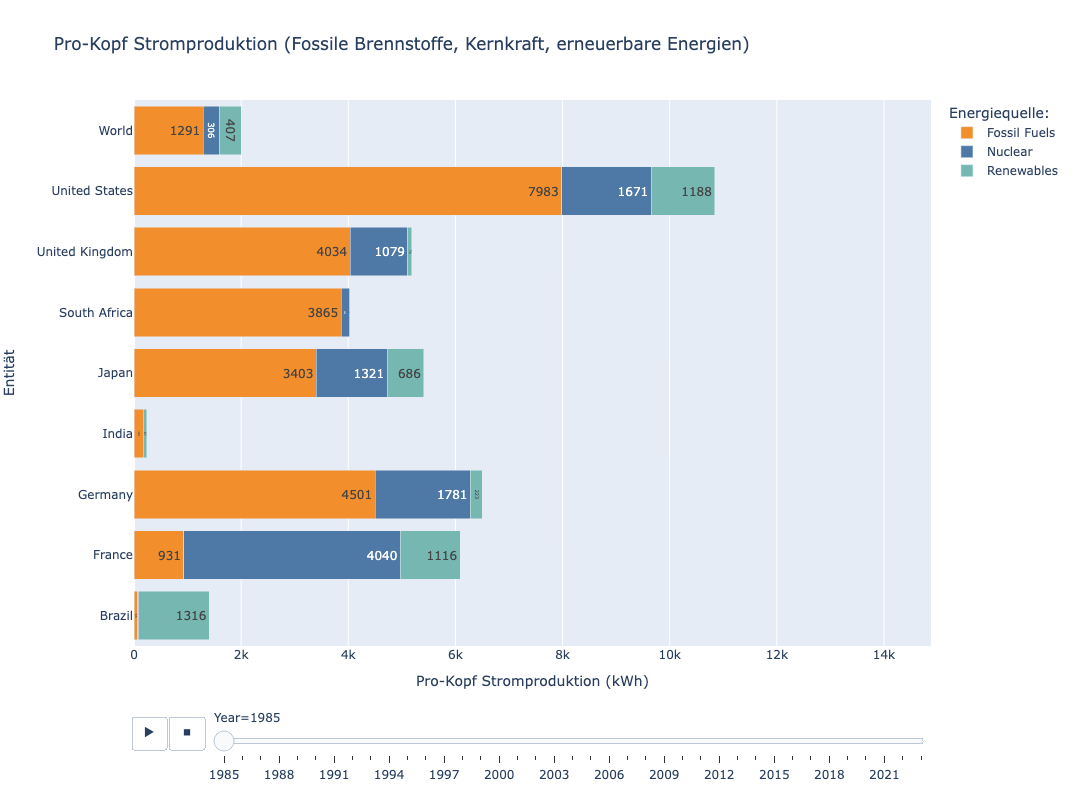

In [130]:
import pandas as pd
import plotly.express as px

# Datensatz laden
df = pd.read_csv('df_merged.csv')

# Kategorisierung der Energiequellen
Fossil_Fuels = ['Oil (TWh)', 'Gas (TWh)', 'Coal (TWh)']
Nuclear = ['Nuclear (TWh)']
Renewables = ['Solar (TWh)', 'Wind (TWh)', 'Hydro (TWh)', 'Renewables excl. bioenergy (TWh)', 'Bioenergy (TWh)']

# Pro-Kopf-Berechnung: Gesamtstromerzeugung durch die Bevölkerung für jede Energiequelle in kWh
df['Fossil Fuels'] = df[Fossil_Fuels].sum(axis=1) / df['Total Population'] *1e9
df['Nuclear'] = df[Nuclear].sum(axis=1) / df['Total Population'] *1e9
df['Renewables'] = df[Renewables].sum(axis=1) / df['Total Population'] *1e9

# Um sicherzustellen, dass keine unnötigen Leerzeichen in den Ländernamen sind, standardisieren wir die 'Entity' Spalte
df['Entity'] = df['Entity'].str.strip()  # Entfernt führende/nachfolgende Leerzeichen
df['Entity'] = df['Entity'].str.replace('  ', ' ')  # Falls es doppelte Leerzeichen gibt, werden diese ersetzt

# Umformung der Daten für gestapeltes Balkendiagramm
df_melted = df.melt(
    id_vars=['Entity', 'Year'],
    value_vars=['Fossil Fuels', 'Nuclear', 'Renewables'],
    var_name='Energy Source',
    value_name='Per Capita Generation (TWh)',
)

# Umbenennung der Energiequellen für die Legende
df_melted.loc[:, 'Energy Source'] = df_melted['Energy Source'].replace({
    'Fossil Fuels': 'Fossil Fuels',
    'Nuclear': 'Nuclear',
    'Renewables': 'Renewables',
})

# Auswahl von Ländern (z. B. USA, Indien, China, UK, Welt)
countries_to_plot = ['United States', 'India', 'United Kingdom', 'World', 'France', 'Germany', 'South Africa', 'Brazil', 'Japan']
df_filtered = df_melted[df_melted['Entity'].isin(countries_to_plot)].copy()

# Erstellung des gestapelten Balkendiagramms mit Pro-Kopf-Werten
fig = px.bar(
    df_filtered,
    x="Per Capita Generation (TWh)",
    y="Entity",
    color="Energy Source",
    animation_frame="Year",
    text="Per Capita Generation (TWh)",  # Werte im Balken anzeigen
    title="Pro-Kopf Stromproduktion (Fossile Brennstoffe, Kernkraft, erneuerbare Energien)",
    labels={
        "Per Capita Generation (TWh)": "Per Capita Generation (TWh)",
        "Entity": "Country",
    },
    orientation="h",
    color_discrete_sequence=["#F28E2B", "#4E79A7", "#76B7B2"],  # Farben anpassen
)

# Layout anpassen
fig.update_traces(texttemplate='%{text:.0f}', textposition='inside')
fig.update_layout(
    barmode="stack",
    xaxis_title="Per Capita Generation (KWh)",
    yaxis_title="Entität",
    width=800,
    height=800,
    xaxis=dict(
        title="Pro-Kopf Stromproduktion (kWh)",
        range=[0, df_filtered['Per Capita Generation (TWh)'].max() * 1.5]),  # Maximale x-Achse vergrößern
    legend_title="Energiequelle:",
)

# Darstellung
fig.show()


##### Vergleicht man die Pro-Kopf Stromerzeugung der oben abgebildeten Länder fällt folgendes auf:
* Die gesamte Pro-Kopf Stromerzeugung ist bei der **USA** über alle Jahre hinweg am höchsten
* Im Jahr 1985 wurde Pro-Kopf, mit Ausnahme von **Brasilien und Frankreich**, am meisten Strom aus **fossilen Brennstoffen** erzeugt 
* Im Jahr 2023 wird Pro-Kopf immer mehr Strom aus **erneuerbaren Energien** gewonnen. **Deutschland** und **Brasilien** sind hier allen anderen Ländern überlegen.

##### Bisher haben wir die Stromerzeugung aus den entsprechenden Quellen für die jeweiligen Entitäten für den Zeitraum von 1985-2023 durch Balken- oder Liniendiagramme dargestellt. Nun soll auf einer **interaktiven Weltkarte** folgendes veranschaulicht werden:
* Welche Länder beziehen am meisten Strom aus kohlenstoffarmen Quellen: Kernkraft und erneuerbare Energien?
* Welche Länder beziehen immer noch am meisten Strom aus fossilen Brennstoffen?

##### Um eine interaktive Weltkarte zu erstellen, werden zuerst alle Entitäten aus dem Datensatz entfernt, die kein Land, sondern ein Bündnis bzw. ein Kontinent repräsentieren.

In [72]:
# Liste der Entitäten die aus dem Datensatz entfernt werden sollen
values_to_drop = ['ASEAN', 'Africa', 'Asia', 'Asia Pacific', 'CIS', 'Europe', 
'European Union', 'G20', 'G7', 'High-income countries', 
'Latin America and Caribbean', 'Low-income countries', 'Lower-middle-income countries', 
'Non-OECD', 'North America', 'OECD', 'Oceania', 'Upper-middle-income countries']
# Zeilen entfernen, bei denen in der 'Entity' einer der oben angegeben Werte enthält
df_countries = df1[~df1['Entity'].isin(values_to_drop)]

In [73]:
print(f"Entitäten im alten Datensatz: {df1['Entity'].nunique()}")
print(f"Entitäten im neuen Datensatz: {df_countries['Entity'].nunique()}")
print(f"Es wurden insgesamt {df1['Entity'].nunique() - df_countries['Entity'].nunique()} Entitäten gelöscht")

Entitäten im alten Datensatz: 232
Entitäten im neuen Datensatz: 214
Es wurden insgesamt 18 Entitäten gelöscht


In [74]:
# Gefilterten Datensatz abspeichern, um ihn später reinzuladen
df_countries.to_csv('df_countries.csv', index=False)

#### Erstellung einer interaktiven Weltkarte für die Stromgewinnung aus kohlenstoffarmen Quellen

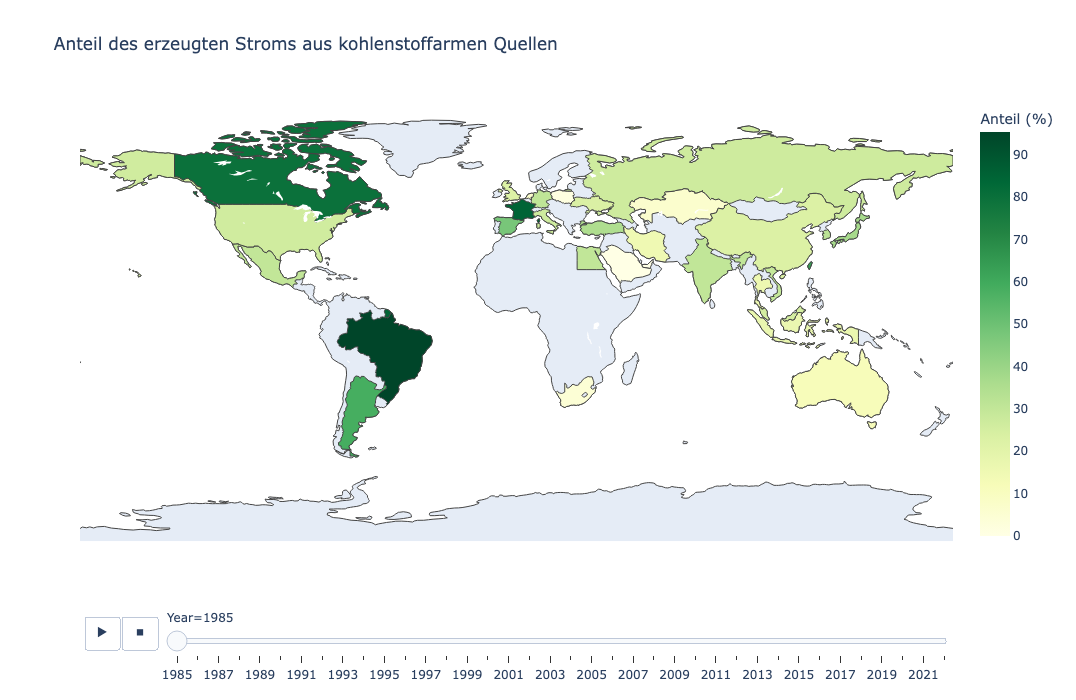

In [132]:
import pandas as pd
import plotly.express as px

# Daten laden 
df = pd.read_csv('df_countries.csv')

# Annahme: Die relevanten Spalten im Datensatz sind:
# - 'Entity' (Land)
# - 'Year' (Jahr)
# - 'Low-Carbon Sources' (Stromerzeugung durch CO2-arme Quellen in TWh)
# - 'Total Energy (TWh)' (Gesamtstromerzeugung in TWh)

# Berechnung des prozentualen Anteils für Low-Carbon Sources
df['Low-Carbon Share (%)'] = (df['Low-Carbon Sources'] / df['Total Energy (TWh)']) * 100

# Konvertiere die Spalte 'Year' in numerischen Typ, falls sie nicht numerisch ist
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Filter auf relevante Jahre (1985 bis 2022)
df_filtered = df[(df['Year'] >= 1985) & (df['Year'] <= 2022)]

# Sortiere die Daten nach 'Year', um den Zeitstrahl korrekt darzustellen
df_filtered = df_filtered.sort_values(by='Year')

# Filter auf relevante Jahre und Spalten
df_filtered = df_filtered[['Entity', 'Year', 'Low-Carbon Share (%)']]

# Erstellen der interaktiven Weltkarte
fig = px.choropleth(
    df_filtered,
    locations="Entity",  # Länder
    locationmode="country names",  # Ländernamen verwenden (muss zu ISO-Standards passen)
    color="Low-Carbon Share (%)",  # Die zu visualisierende Spalte
    hover_name="Entity",  # Ländername in Hover-Info
    animation_frame="Year",  # Animation über die Jahre
    title="Anteil des erzeugten Stroms aus kohlenstoffarmen Quellen",
    labels={'Low-Carbon Share (%)': 'Share (%)'},  # Achsentitel und Legende
    color_continuous_scale=px.colors.sequential.YlGn  # Farbskala anpassen
)

# Layout anpassen
fig.update_layout(
    geo=dict(
        showframe=False,  # Kein Rahmen
        showcoastlines=True,  # Küstenlinien anzeigen
        projection_type='equirectangular'  # Kartentyp
    ),
    coloraxis_colorbar=dict(
        title="Anteil (%)",  # Titel für Farbskala
    ),
    width=800,  # Breite der Grafik
    height=700   # Höhe der Grafik
)

# Darstellung
fig.show()


##### Aus der interaktiven Weltkarte für die Stromgewinnung aus kohlenstoffarmen Quellen wird folgendes ersichtlich:
* Im Jahr 1985 sind viele Länder noch grau hinterlegt, was bedeuten kann, dass
    * damals noch keine Daten in Ländern wie Südamerika oder Afrika aufgenommen wurden, oder
    * diese Länder wirklich noch keinen Strom aus kohlenstoffarmen Quellen bezogen haben
* Einige Länder beziehen seit 2022 **mehr als 90%** ihres Stroms aus *Atomkraft oder erneuerbaren Energien* wie z.B:
    * Schweden, Norwegen, Finnland, Island, Frankreich, Nepal, Paraguay, Uruguay und Brasilien u.v.m.
* Einteilung in Kontinente:
    * Europa, Nord- und Südamerika haben vergleichsweise sehr hohe Prozentanteile
    * Länder in Nordafrika, Asien sowie Australien liegen teilweise noch unter 50%

#### Erstellung einer interaktiven Weltkarte für die Stromgewinnung aus fossilen Brennstoffen

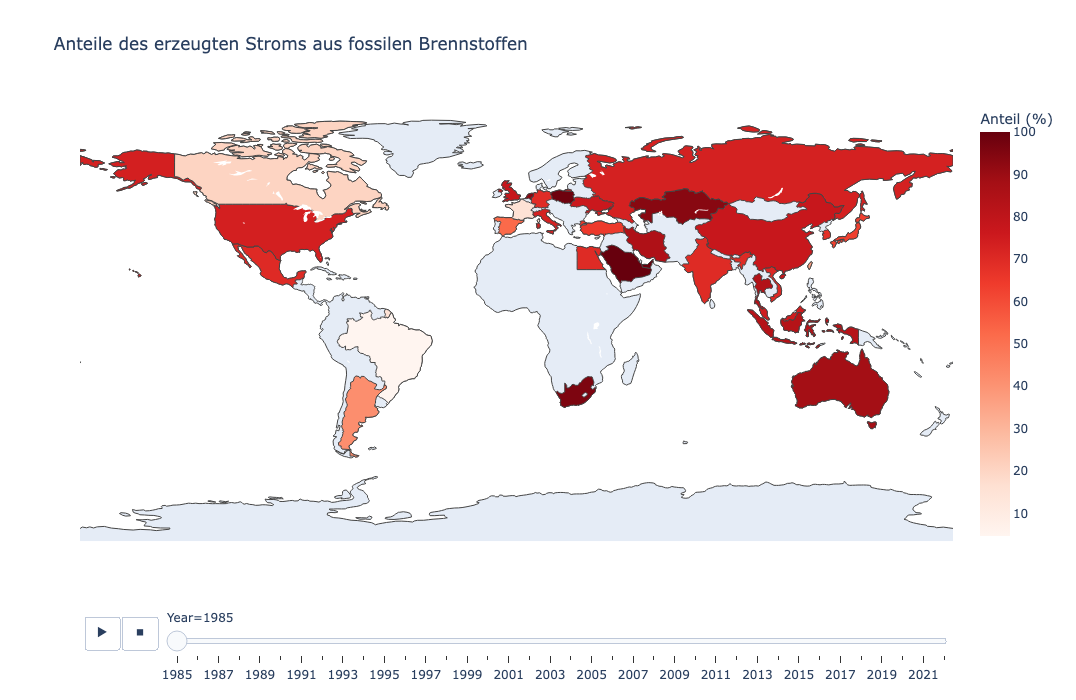

In [134]:
import pandas as pd
import plotly.express as px

# Daten laden 
df = pd.read_csv('df_countries.csv')

# Annahme: Die relevanten Spalten im Datensatz sind:
# - 'Entity' (Land)
# - 'Year' (Jahr)
# - 'Fossil Fuels' (Stromerzeugung durch fossile Brennstoffe in TWh)
# - 'Total Energy (TWh)' (Gesamtstromerzeugung in TWh)

# Berechnung des prozentualen Anteils für Low-Carbon Sources
df['Fossil Fuels Share (%)'] = (df['Fossil Fuels'] / df['Total Energy (TWh)']) * 100

# Konvertiere die Spalte 'Year' in numerischen Typ, falls sie nicht numerisch ist
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Filter auf relevante Jahre (1985 bis 2022)
df_filtered = df[(df['Year'] >= 1985) & (df['Year'] <= 2022)]

# Sortiere die Daten nach 'Year', um den Zeitstrahl korrekt darzustellen
df_filtered = df_filtered.sort_values(by='Year')

# Filter auf relevante Jahre und Spalten
df_filtered = df_filtered[['Entity', 'Year', 'Fossil Fuels Share (%)']]

# Erstellen der interaktiven Weltkarte
fig = px.choropleth(
    df_filtered,
    locations="Entity",  # Länder
    locationmode="country names",  # Ländernamen verwenden (muss zu ISO-Standards passen)
    color="Fossil Fuels Share (%)",  # Die zu visualisierende Spalte
    hover_name="Entity",  # Ländername in Hover-Info
    animation_frame="Year",  # Animation über die Jahre
    title="Anteile des erzeugten Stroms aus fossilen Brennstoffen",
    labels={'Fossil Fuels Share (%)': 'Share (%)'},  # Achsentitel und Legende
    color_continuous_scale=px.colors.sequential.Reds  # Farbskala anpassen
)

# Layout anpassen
fig.update_layout(
    geo=dict(
        showframe=False,  # Kein Rahmen
        showcoastlines=True,  # Küstenlinien anzeigen
        projection_type='equirectangular'  # Kartentyp
    ),
    coloraxis_colorbar=dict(
        title="Anteil (%)",  # Titel für Farbskala
    ),
    width=800,  # Breite der Grafik
    height=700   # Höhe der Grafik
)

# Darstellung
fig.show()


##### Als Vergleich zu kohlenstoffarmen Quellen wurde bei dieser Weltkarte eine Grafik für die Stromerzeugung aus fossilen Brennstoffen abgebildet, welche folgende Erkenntnisse mit sich bringt:
* Ähnlich wie in der vorherigen Grafik fehlen im Jahr 1985 Einträge für einige Länder aus Südamerika und Afrika
* Einige Länder beziehen im Jahr 2022 immer noch **mehr als 90%** ihres Stroms aus *Kohle, Gas oder Öl* wie z.B:
    * Algerien, Libyen, Saudi Arabien, Irak, Iran, Guyana, Cuba, Bangladesh u.v.m.
* Kontinente mit hohen Werten: Nordafrika, Asien und Australien
* Kontinente mit niedrigeren Werten: Europa, Nord- und Südamerika

#### Fazit

* Die Mehrheit des Stroms wird weltweit immer noch aus Kohle gewonnen
* Kohle (36%), Gas (22%) und Wasserkraft (14%) machen weltweit unseren Strommix aus
* Erneuerbare Energien machen weltweit nur 30% aus
* Positiver Trend weltweit für kohlenstoffarme Quellen (39%)
* Länder wie Schweden, Norwegen, Finnland, Island, Paraguay, Uruguay und Brasilien beziehen bereits mehr als 90% ihren Stroms aus kohlenstoffarmen Quellen